In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
with open("extracted_chats.txt","r",encoding="utf8") as file:
    lines=file.readlines()


time=[]
name=[]
action=[]

for line in lines:
    lineArr=line.split("-")
    time.append((lineArr[0].split(","))[1].strip())
    name_action=lineArr[1].split(":")
    name.append(name_action[0].strip())
    action.append(name_action[1].strip())


FileNotFoundError: [Errno 2] No such file or directory: 'extracted_chats.txt'

In [55]:
chatDict={"Time":time,"Name":name,"Action":action}
df=pd.DataFrame(chatDict)
df.head()


,Time,Name,Action
0,09:47,+91 79022 72267,*I like to do
1,09:48,+91 79022 72267,Eating
2,09:48,+91 79022 72267,Sleeping
3,09:48,+91 79022 72267,Singing
4,09:48,+91 79022 72267,Travelling


In [56]:
#replace naived no.
map_num={"+91 79022 72267":"Naived","+91 98787 57935":"Suraj",}
df.loc[df["Name"]=="+91 79022 72267","Name"]="Naived"
df.loc[df["Name"]=="+91 98787 57935","Name"]="Suraj"


df.drop(index=0,inplace=True)
df.head()

,Time,Name,Action
1,09:48,Naived,Eating
2,09:48,Naived,Sleeping
3,09:48,Naived,Singing
4,09:48,Naived,Travelling
5,09:48,Suraj,Eating


In [57]:
df.describe(include='all')

,Time,Name,Action
count,778,778,778
unique,25,79,235
top,09:50,+91 89865 78410,Eating
freq,139,115,132


In [58]:
df_group=df.groupby(by="Name").count()
df_group.sort_values(by=["Action"],ascending=False)
df_group

,Time,Action
Name,,
+91 6238 966 360,6,6
+91 6362 255 208,7,7
+91 6394 576 322,12,12
+91 70021 08806,5,5
+91 70550 70679,5,5
...,...,...
Ujan MSc,3,3
Vikas K,4,4
Yeshwant Msc,8,8


In [63]:
count_df=pd.DataFrame(index=df.columns)
count_df["nul"]=df.isna().sum()
count_df

,nul
Time,0
Name,0
Action,0


<Axes: xlabel='Action', ylabel='count'>

C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  func(*args, **kwargs)
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  func(*args, **kwargs)
C:\Users\jyosn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{R

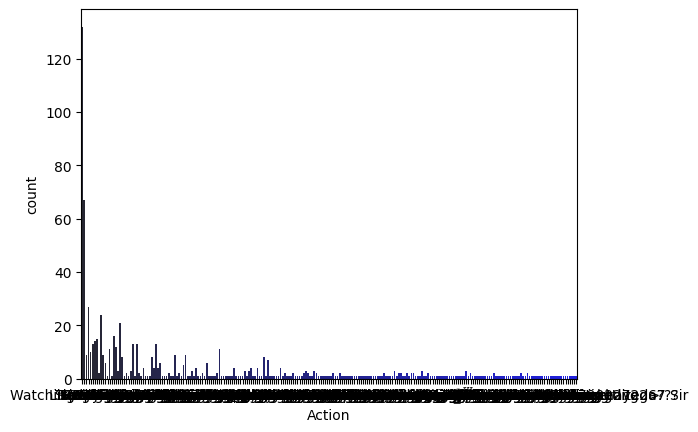

In [67]:
import seaborn as sns
fig,ax=plt.subplots()
fig=pie